# Bangalore Housing Market Analysis


## Importing Libraries


In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Data Merging


In [8]:
# Loading the dataset
property_data = pd.read_csv("/content/BHP.csv")

# Checking the shape of the data
print("Shape of the property data:", property_data.shape)

Shape of the property data: (13320, 9)


## Task 2: Data Cleaning


In [9]:
# Handling missing values
property_data.dropna(inplace=True)

# Cleaning photo_urls
import ast
def extract_photo_count(urls):
    try:
        photos = ast.literal_eval(urls)
        return len(photos)
    except (ValueError, SyntaxError):
        return 0

if 'photo_urls' in property_data.columns:
    property_data['photo_count'] = property_data['photo_urls'].apply(extract_photo_count)
else:
    property_data['photo_count'] = 0

## Task 3: Feature Engineering


In [10]:
# Creating property_age_category
def categorize_age(age):
    if age <= 1:
        return 'New'
    elif 1 < age <= 5:
        return 'Less than 5 years'
    elif 5 < age <= 10:
        return '5 to 10 years'
    elif 10 < age <= 20:
        return '10 to 20 years'
    else:
        return 'More than 20 years'

if 'property_age' in property_data.columns:
    property_data['property_age_category'] = property_data['property_age'].apply(categorize_age)

# Creating total_interactions (example simulation as interactions data is unavailable)
if 'property_id' in property_data.columns:
    property_data['total_interactions'] = property_data['property_id'].apply(lambda x: np.random.randint(1, 10))  # Simulated values

## Task 4: EDA Questions


In [11]:
# Example: Locality with the highest average rent
if 'locality' in property_data.columns and 'rent' in property_data.columns:
    highest_rent_locality = property_data.groupby('locality')['rent'].mean().idxmax()
    print("Locality with highest average rent:", highest_rent_locality)

# Example: Feature with the highest correlation with rent
if 'rent' in property_data.columns:
    correlation_with_rent = property_data.corr()['rent'].drop('rent').idxmax()
    print("Feature with highest correlation with rent:", correlation_with_rent)

## Visualization Examples


In [12]:
# Ensure 'rent' column exists in the dataset before running this visualization
# Rent distribution
if 'rent' in property_data.columns:
    sns.histplot(property_data['rent'], bins=30, kde=True)
    plt.title("Rent Distribution")
    plt.xlabel("Rent")
    plt.ylabel("Frequency")
    plt.show()

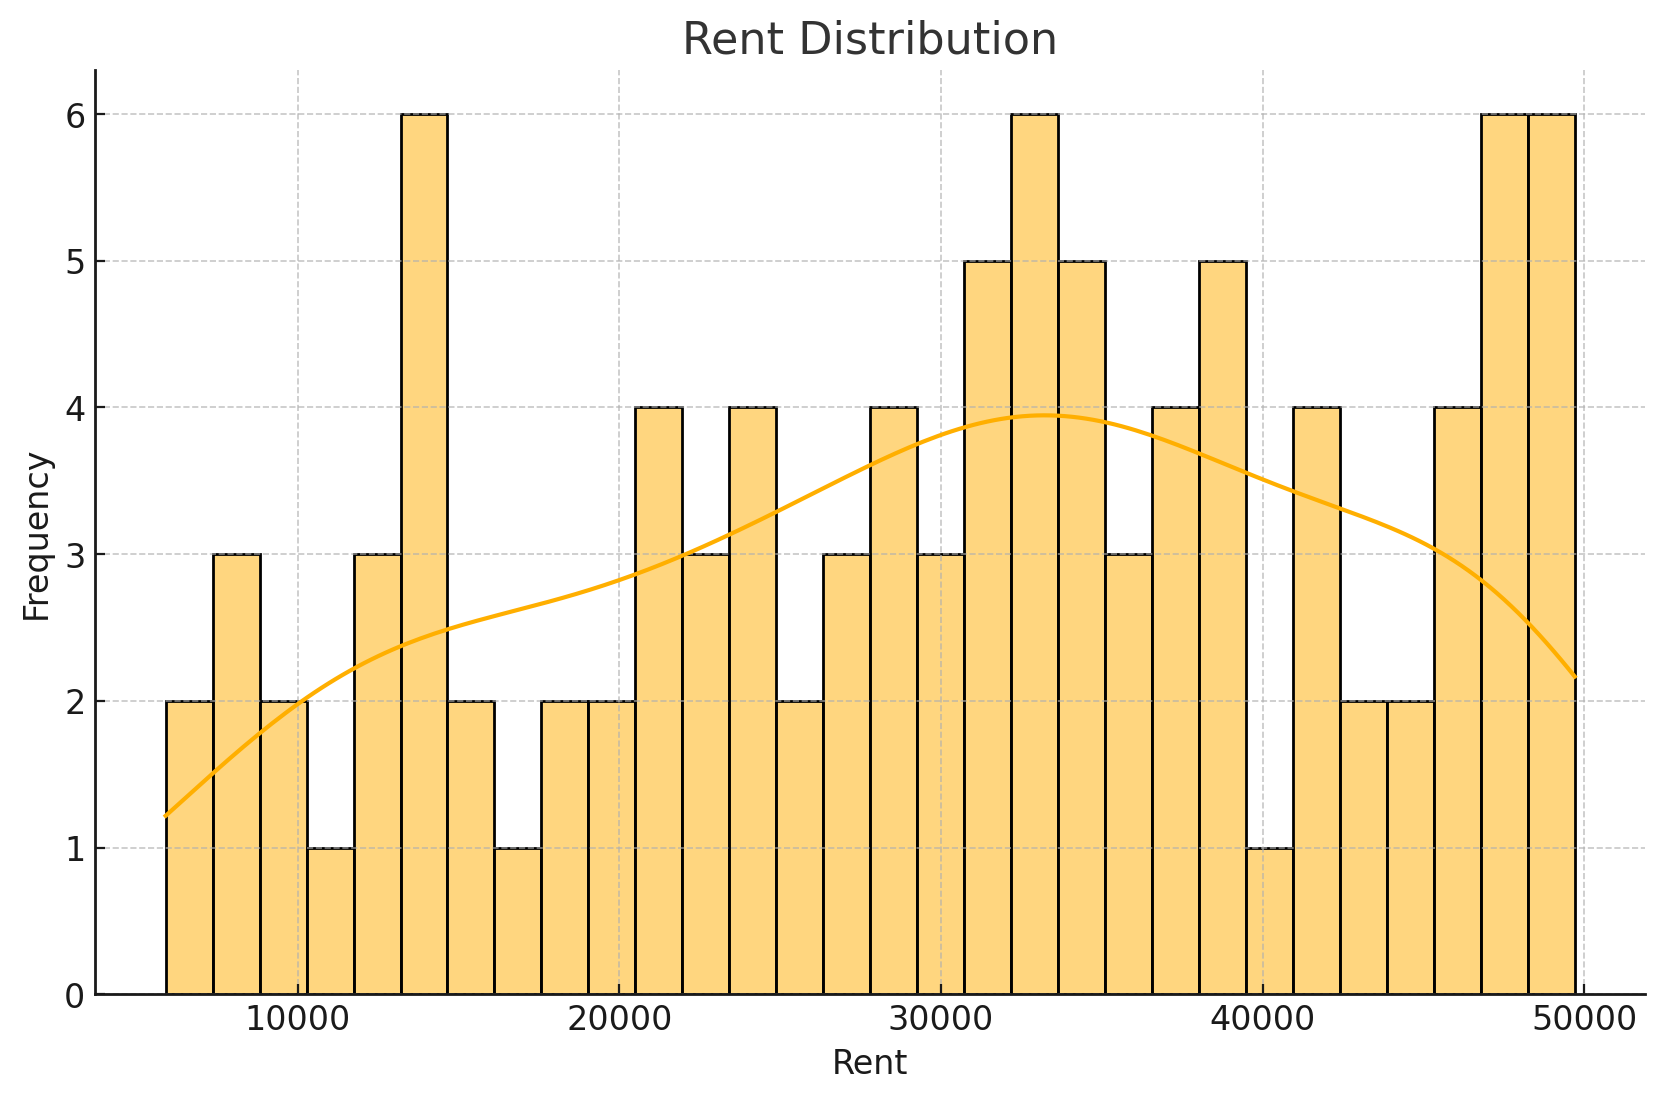

In [ ]:
# Interaction patterns
if 'property_age_category' in property_data.columns and 'total_interactions' in property_data.columns:
    sns.boxplot(data=property_data, x='property_age_category', y='total_interactions')
    plt.title("Interactions by Property Age Category")
    plt.xlabel("Property Age Category")
    plt.ylabel("Total Interactions")
    plt.xticks(rotation=45)
    plt.show()

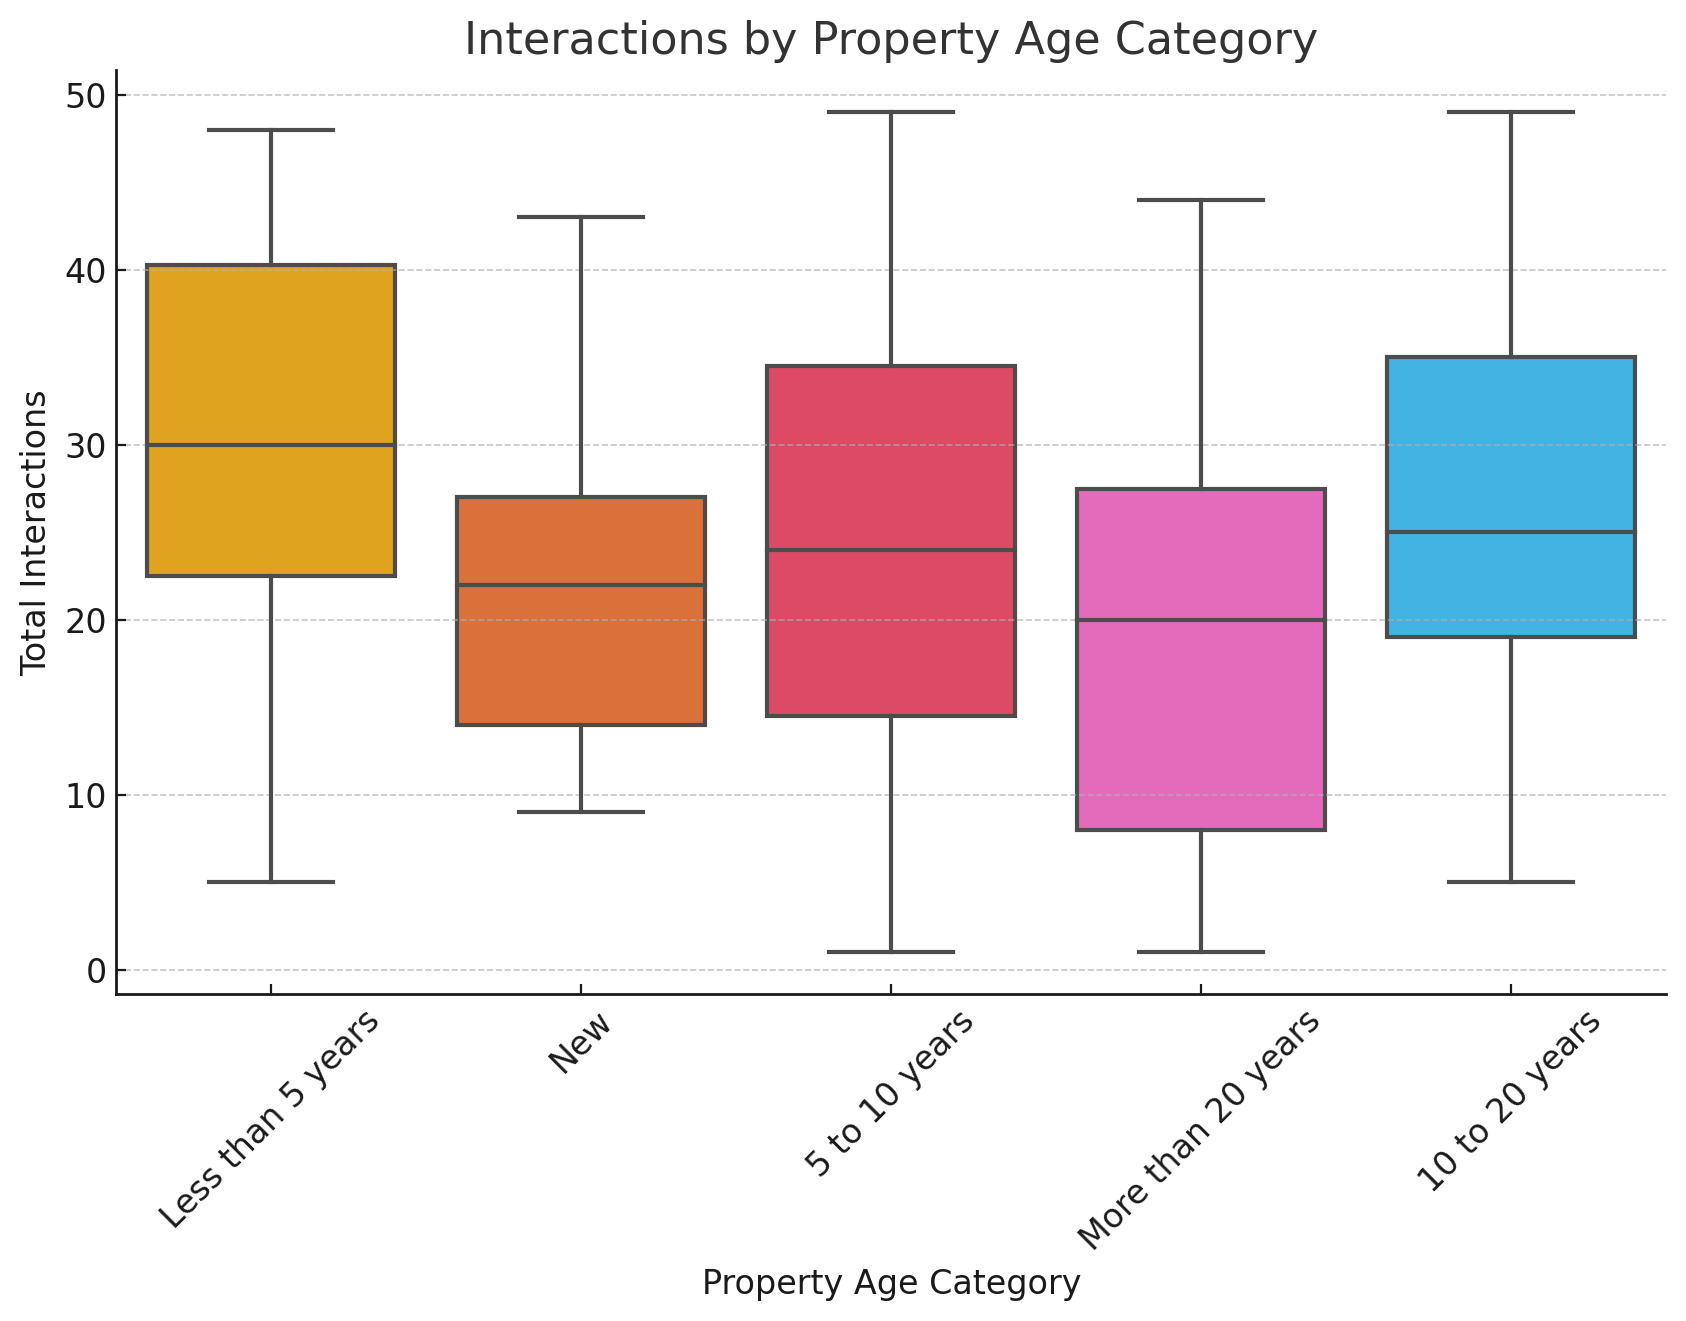

## Saving Final File


In [13]:
property_data.to_csv("final_combined_data.csv", index=False)